### 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import Counter
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import speech_recognition as sr
import tkinter
from tkinter import filedialog
from tkinter import *

### 2. Load Dataset 

In [2]:
df = pd.read_csv("mbti.csv")

### 3. Exploratory Data Analysis & Data Transformation

#### 3.1 To view the first 10 records of the dataset

In [3]:
df.head(10) 

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


#### 3.2 To check if there are any missing values in the dataset

In [4]:
df.isnull().any() 

type     False
posts    False
dtype: bool

#### 3.3 To get basic information about the dataset

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


#### 3.4 To view the unique values in the 'type' coloumn of the dataset

In [6]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

#### 3.5 To get the count of posts in the dataset classifed by MBTI personality types

In [7]:
total = df.groupby(['type']).count()
total

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


#### 3.6 To view the count of posts in the dataset classifed by MBTI personality types in bar chart form

C:\Users\asifs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

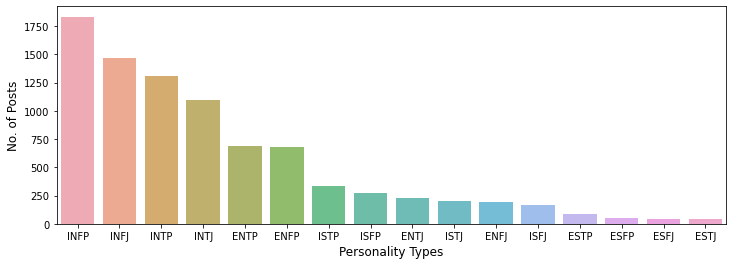

In [8]:
count_type = df['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(count_type.index, count_type.values, alpha = 0.8)
plt.xlabel('Personality Types', fontsize = 12)
plt.ylabel('No. of Posts', fontsize = 12)
plt.show

#### 3.7 Importing new MBTI dataset to balance the existing dataset

In [9]:
df2 = pd.read_csv("MBTI 500.csv")

#### 3.8 To get the count of posts in the new dataset classifed by MBTI personality types

In [10]:
total_df2 = df2.groupby(['type']).count()
total_df2

,posts
type,
ENFJ,1534
ENFP,6167
ENTJ,2955
ENTP,11725
ESFJ,181
ESFP,360
ESTJ,482
ESTP,1986
INFJ,14963


#### 3.9 To get basic information about the dataset

In [11]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


#### 3.10 Extracting equal number of records from both datasets to create a balanced final dataset

In [12]:
df2_enfj = df2[df2['type'] == 'ENFJ'].head(250)
df_enfp = df[df['type'] == 'ENFP'].head(250)
df2_entj = df2[df2['type'] == 'ENTJ'].head(250)
df_entp = df[df['type'] == 'ENTP'].head(250)
df2_esfj = df2[df2['type'] == 'ESFJ'].head(181)
df_esfj = df[df['type'] == 'ESFJ'].head(42)
df2_esfp = df2[df2['type'] == 'ESFP'].head(250)
df2_estj = df2[df2['type'] == 'ESTJ'].head(250)
df2_estp = df2[df2['type'] == 'ESTP'].head(250)
df_infj = df[df['type'] == 'INFJ'].head(250)
df_infp = df[df['type'] == 'INFP'].head(250)
df_intj = df[df['type'] == 'INTJ'].head(250)
df_intp = df[df['type'] == 'INTP'].head(250)
df2_isfj = df2[df2['type'] == 'ISFJ'].head(250)
df2_isfp = df2[df2['type'] == 'ISFP'].head(250)
df2_istj = df2[df2['type'] == 'ISTJ'].head(250)
df_istp = df[df['type'] == 'ISTP'].head(250)

data = pd.DataFrame()
data = pd.concat([df2_enfj, df_enfp, df2_entj, df_entp, df2_esfj, df_esfj, df2_esfp, df2_estj, df2_estp, df_infj, df_infp, df_intj, df_intp, df2_isfj, df2_isfp, df2_istj, df_istp])

#### 3.11 To view the first 10 records of the final dataset

In [13]:
data.head(10)

,posts,type
53580,yeah quite like idea actually think could numb...,ENFJ
53581,idea thing thing value others perceive relevan...,ENFJ
53582,respect say year sound bite silly might soft r...,ENFJ
53583,interaction unavoidable witness student intern...,ENFJ
53584,core probably see relationship work also sound...,ENFJ
53585,golden retriever ever gotta take walk sometime...,ENFJ
53586,agree hop someone already type yes obviously d...,ENFJ
53587,wish well pm need someone talk ask question hm...,ENFJ
53588,temperament question find easy lay around day ...,ENFJ
53589,associate high ti xntps lot intellectual willp...,ENFJ


#### 3.12 To view the count of posts in the final dataset classifed by MBTI personality types in bar chart form

C:\Users\asifs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

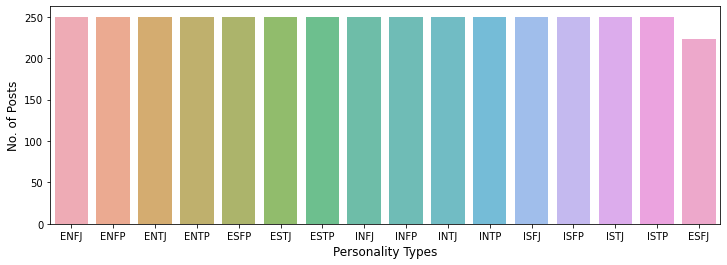

In [14]:
count_type = data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(count_type.index, count_type.values, alpha = 0.8)
plt.xlabel('Personality Types', fontsize = 12)
plt.ylabel('No. of Posts', fontsize = 12)
plt.show

#### 3.13 To view the most common words from the final dataset

In [15]:
words = list(data['posts'].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(20)

[('I', 80029),
 ('to', 59989),
 ('the', 56535),
 ('a', 47688),
 ('and', 45169),
 ('of', 36775),
 ('like', 28061),
 ('you', 27503),
 ('that', 26654),
 ('is', 26531),
 ('in', 24162),
 ('think', 22337),
 ('my', 21189),
 ('it', 19555),
 ('people', 18665),
 ('for', 17100),
 ('get', 16523),
 ('have', 16347),
 ('with', 16000),
 ('but', 15393)]

#### 3.14 To view the words in 'post' coloumn from the final dataset in wordcloud form

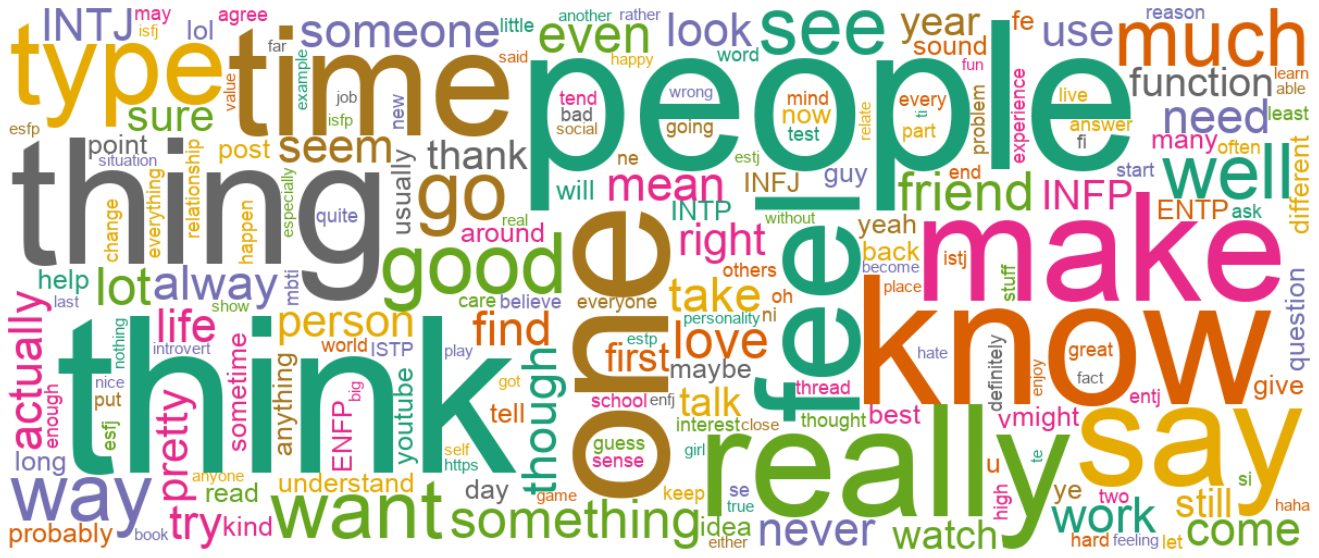

In [16]:
wc = wordcloud.WordCloud(width = 1200, height = 500, font_path = "./arial.ttf",
                        collocations = False, background_color = 'white',
                        colormap = 'Dark2').generate(" ".join(words))
plt.figure(figsize = (25, 10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

#### 3.15 To view the words in 'post' coloumn from the final dataset classified by MBTI personality types in wordcloud form

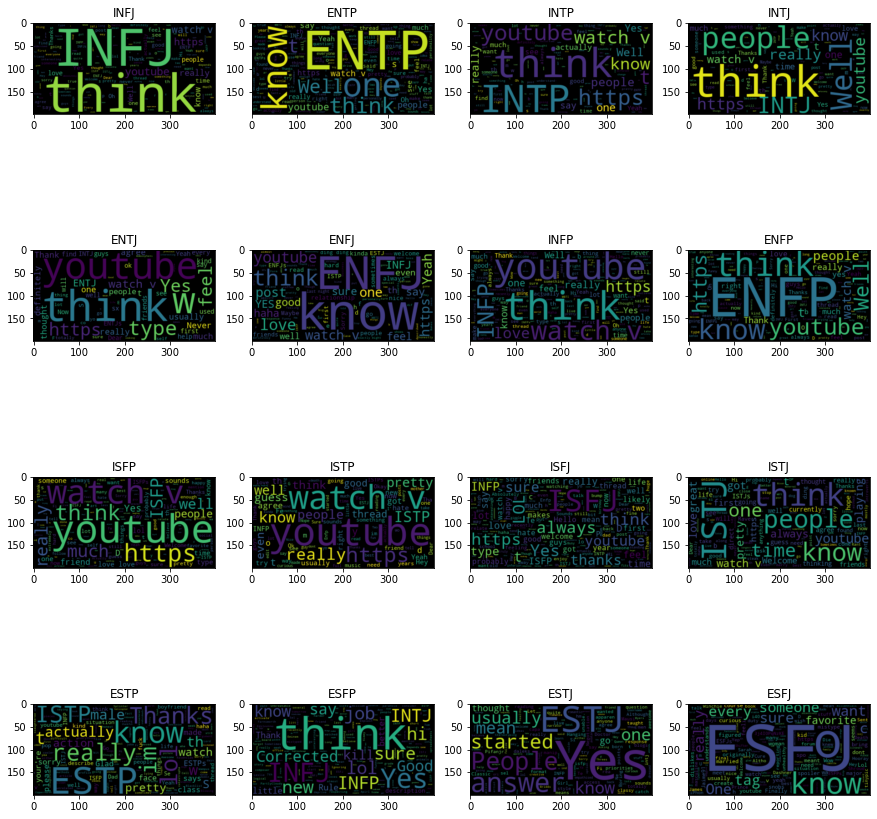

In [17]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

### 4. Data Pre-Processing 

#### 4.1 To remove unnecessary characters and words from the dataset

In [18]:
df = data.copy()
def preprocess_text(df, remove_special=True):
    texts = df['posts'].copy()
    labels = df['type'].copy()

    # to remove links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    # to keep the end of sentence characters
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    # to strip punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    # to remove multiple fullstops
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    # to remove non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    # to convert posts to lowercase
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    # to remove multiple letter repeating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    # to remove very short or long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    # to remove MBTI personality words - crutial in order to get valid model accuracy estimation for unseen data. 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")
    
    return df

# preprocessing of entered Text
new_df = preprocess_text(data)

### 5. Feature Engineering

#### 5.1 To view the first 10 records of the processed dataset 

In [19]:
new_df.head(10)

,posts,type
53580,yeah quite like idea actually think could numb...,ENFJ
53581,idea thing thing value others perceive relevan...,ENFJ
53582,respect year sound bite silly might soft reje...,ENFJ
53583,interaction unavoidable witness student intern...,ENFJ
53584,core probably relationship work also sound li...,ENFJ
53585,golden retriever ever gotta take walk sometime...,ENFJ
53586,agree someone already type obviously differe...,ENFJ
53587,wish well need someone talk question,ENFJ
53588,temperament question find easy around relax ...,ENFJ
53589,associate high xntps intellectual willpower ...,ENFJ


#### 5.2 To encode the MBTI personality type for easier processing

In [20]:
enc = LabelEncoder()
new_df['type (encoded)'] = enc.fit_transform(new_df['type'])
target = new_df['type (encoded)']

#### 5.3 To view the first 10 records of the processed dataset along with the encoded values

In [21]:
new_df.head(10)

,posts,type,type (encoded)
53580,yeah quite like idea actually think could numb...,ENFJ,0
53581,idea thing thing value others perceive relevan...,ENFJ,0
53582,respect year sound bite silly might soft reje...,ENFJ,0
53583,interaction unavoidable witness student intern...,ENFJ,0
53584,core probably relationship work also sound li...,ENFJ,0
53585,golden retriever ever gotta take walk sometime...,ENFJ,0
53586,agree someone already type obviously differe...,ENFJ,0
53587,wish well need someone talk question,ENFJ,0
53588,temperament question find easy around relax ...,ENFJ,0
53589,associate high xntps intellectual willpower ...,ENFJ,0


#### 5.4 To filter stop words from posts and to vectorize it

In [22]:
# vectorizing the posts for the model and filtering stop-words
vect = CountVectorizer(stop_words = 'english') 

# converting posts into numerical form by count vectorization
train = vect.fit_transform(new_df["posts"])

# basically the posts are converted into a numerical format which can be understood by machines. further, stop words are removed

### 6. Training & Evaluation

#### 6.1 Splitting the dataset into training and testing datasets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, stratify = target, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2781, 56914) (2781,) (1192, 56914) (1192,)


#### 6.2 Calculating accuracy using XG Boost 

In [24]:
# create a XGB classifier
xgb = XGBClassifier()

# train the classifier on the training data
xgb.fit(X_train, y_train)

# make predictions on the test set
y_pred = xgb.predict(X_test)

# round off values from in the output
predictions = [round(value) for value in y_pred]

# calculate accuracy by comparing predicted and actual labels
accuracy = accuracy_score(y_test, predictions)

# print the accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.78%


#### 6.3 Calculating accuracy using Logistic Regression

In [25]:
# create a logistic regression classifier
logreg = LogisticRegression()

# train the classifier on the training data
logreg.fit(X_train, y_train)

# make predictions on the test set
y_pred = logreg.predict(X_test)

# round off values from in the output
predictions = [round(value) for value in y_pred]

# calculate accuracy by comparing predicted and actual labels
accuracy = accuracy_score(y_test, predictions)

# print the accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.27%


C:\Users\asifs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 6.4 Calculating accuracy using Support Vector Machines

In [26]:
# create an SVM classifier
svm = SVC(random_state = 1)

# train the classifier on the training data
svm.fit(X_train, y_train)

# make predictions on the test set
y_pred = svm.predict(X_test)

# round off values from in the output
predictions = [round(value) for value in y_pred]

# calculate accuracy by comparing predicted and actual labels
accuracy = accuracy_score(y_test, predictions)

# print the accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.53%


#### 6.5 Calculating accuracy using Decision Tree

In [27]:
# create a Decision Tree classifier
tree = DecisionTreeClassifier()

# train the classifier on the training data
tree.fit(X_train, y_train)

# make predictions on the test set
y_pred = tree.predict(X_test)

# round off values from in the output
predictions = [round(value) for value in y_pred]

# calculate accuracy by comparing predicted and actual labels
accuracy = accuracy_score(y_test, predictions)

# print the accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.27%


### 7. Dividing the MBTI personality types into its 4 classifiers and to further increase the accuracy of the model

#### 7.1 Load Datasets

In [28]:
df1 = pd.read_csv("mbti.csv")
df2 = pd.read_csv("MBTI 500.csv")

#### 7.2 Extracting equal number of records from both datasets to create a balanced final dataset

In [29]:
df2_enfj = df2[df2['type'] == 'ENFJ'].head(250)
df1_enfp = df1[df1['type'] == 'ENFP'].head(250)
df2_entj = df2[df2['type'] == 'ENTJ'].head(250)
df1_entp = df1[df1['type'] == 'ENTP'].head(250)
df2_esfj = df2[df2['type'] == 'ESFJ'].head(181)
df1_esfj = df1[df1['type'] == 'ESFJ'].head(42)
df2_esfp = df2[df2['type'] == 'ESFP'].head(250)
df2_estj = df2[df2['type'] == 'ESTJ'].head(250)
df2_estp = df2[df2['type'] == 'ESTP'].head(250)
df1_infj = df1[df1['type'] == 'INFJ'].head(250)
df1_infp = df1[df1['type'] == 'INFP'].head(250)
df1_intj = df1[df1['type'] == 'INTJ'].head(250)
df1_intp = df1[df1['type'] == 'INTP'].head(250)
df2_isfj = df2[df2['type'] == 'ISFJ'].head(250)
df2_isfp = df2[df2['type'] == 'ISFP'].head(250)
df2_istj = df2[df2['type'] == 'ISTJ'].head(250)
df1_istp = df1[df1['type'] == 'ISTP'].head(250)

data = pd.DataFrame()
data = pd.concat([df2_enfj, df1_enfp, df2_entj, df1_entp, df2_esfj, df1_esfj, df2_esfp, df2_estj, df2_estp, df1_infj, df1_infp, df1_intj, df1_intp, df2_isfj, df2_isfp, df2_istj, df1_istp])

#### 7.3 To add coloumns for the 4 classified MBTI personality type indicators

In [30]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,posts,type,IE,NS,TF,JP
53580,yeah quite like idea actually think could numb...,ENFJ,0,1,0,1
53581,idea thing thing value others perceive relevan...,ENFJ,0,1,0,1
53582,respect say year sound bite silly might soft r...,ENFJ,0,1,0,1
53583,interaction unavoidable witness student intern...,ENFJ,0,1,0,1
53584,core probably see relationship work also sound...,ENFJ,0,1,0,1


#### 7.4 To binarize the 8 letters within the MBTI personailty type inidcators

In [31]:
# splitting the MBTI personality into 4 letters and binarizing it
bin_pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
bin_pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [bin_pers[l] for l in personality]

# to show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += bin_pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]]


### 8. Data Pre-Processing

#### 8.1 To remove unnecessary characters and words from the dataset

In [32]:
lemmatiser = WordNetLemmatizer()

# remove the stop words for speed 
useless_words = stopwords.words("english")

# remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# remove unnecessary characters 
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_data = len(data)
  i=0
  
  for row in data.iterrows():

      # remove and clean comments
      posts = row[1].posts

      # remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      # remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      # remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      # remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      # remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type)
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", data.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", data.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])

Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

### 9. Feature Engineering

#### 9.1 To vectorize posts and to transform it to a tf-idf representation 

In [33]:
# vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 
# the feature should be made of word n-gram 
# learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

# the enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# for the Standardization or Feature Scaling Stage :-
# transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accept'), (4, 'accurate'), (5, 'across'), (6, 'act'), (7, 'action'), (8, 'actual'), (9, 'actually')]

Using Tf-idf :
Now the dataset size is as below
(3973, 553)


### 10. Splitting into X and Y variables

#### 10.1 To check an MBTI personality type with its binarized form

In [34]:
print("For MBTI personality type : %s" % translate_back(list_personality[1,:]))
print("Y : Binarized MBTI 2nd row: %s" % list_personality[1,:])

For MBTI personality type : ENFJ
Y : Binarized MBTI 2nd row: [1 0 0 0]


#### 10.2 Defining all 4 MBTI personality type indicator classifiers

In [35]:
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


### 11. Data Modelling

#### 11.1 Calculating accuracy using XG Boost classifier

In [36]:
X = X_tfidf
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    tree = XGBClassifier()
    tree.fit(X_train, y_train)

    # make predictions for test data
    y_pred = tree.predict(X_test)
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 68.90%
NS: Intuition (N) / Sensing (S) Accuracy: 77.44%
FT: Feeling (F) / Thinking (T) Accuracy: 68.14%
JP: Judging (J) / Perceiving (P) Accuracy: 69.44%


#### 11.2. Improving accuracy by altering XG Boost classifier parameters

In [37]:
param = {}
param['n_estimators'] = 200 
param['max_depth'] = 2 
param['learning_rate'] = 0.2 

total_accuracy = 0.0

for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    tree = XGBClassifier(**param)
    tree.fit(X_train, y_train)

    # make predictions for test data
    y_pred = tree.predict(X_test)
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    
    total_accuracy += accuracy
    
avg_accuracy = total_accuracy/4
print("\nThe Overall Accuracy is %.2f%%" % (avg_accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 70.50%
NS: Intuition (N) / Sensing (S) Accuracy: 78.12%
FT: Feeling (F) / Thinking (T) Accuracy: 69.59%
JP: Judging (J) / Perceiving (P) Accuracy: 71.88%

The Overall Accuracy is 72.52%


### 12. System Implementation & UI Building

In [ ]:
# function for backend when text input is chosen
def backend(my_posts):
    mydata = pd.DataFrame(data={'type': ['INFP'], 'posts': [my_posts]})
    my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
    my_X_cnt = cntizer.transform(my_posts)
    my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

    # setup parameters for xgboost
    param = {}
    param['n_estimators'] = 200
    param['max_depth'] = 2
    param['nthread'] = 8
    param['learning_rate'] = 0.2

    # xgboost model for MBTI dataset
    result = []
    # individually training each mbti personlity type
    for l in range(len(personality_type)):
        print("%s classifier trained" % (personality_type[l]))

        Y = list_personality[:,l]

        # split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

        # fit model on training data
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # make predictions for my  data
        y_pred = model.predict(my_X_tfidf)
        result.append(y_pred[0])


        personality_result = translate_back(result)
    
    
    print("\nThe personality type is", personality_result)

    if (personality_result == 'ISTJ'):
        personality_description = "(ISTJ - Introverted, Sensing, Thinking, Judging)\nThis person is ISTJ. These Individuals are dependable, organized, and thorough. They excel in tasks that require attention to detail, adherence to rules, and structured environments. They make excellent administrators, accountants, and project managers."
    elif (personality_result == 'ISTP'):
        personality_description = "(ISTP - Introverted, Sensing, Thinking, Perceiving)\nThis person is ISTP. These Individuals are practical, logical, and resourceful problem-solvers. They thrive in hands-on tasks and technical fields, such as engineering, mechanics, or computer programming."
    elif (personality_result == 'ISFJ'):
        personality_description = "(ISFJ - Introverted, Sensing, Feeling, Judging)\nThis person is ISFJ. These Individuals are compassionate, responsible, and supportive team players. They excel in roles that involve caring for others, such as nursing, counseling, or human resources."
    elif (personality_result == 'ISFP'):
        personality_description = "(ISFP - Introverted, Sensing, Feeling, Perceiving)\nThis person is ISFP. These Individuals are artistic, empathetic, and flexible. They perform well in creative fields like graphic design, writing, or music, where they can express their emotions and talents."
    elif (personality_result == 'INFJ'):
        personality_description = "(INFJ - Introverted, Intuitive, Feeling, Judging)\nThis person is INFJ. These Individuals are insightful, empathetic, and idealistic. They make excellent counselors, teachers, or social workers, where they can help others and work toward meaningful goals."
    elif (personality_result == 'INFP'):
        personality_description = "(INFP - Introverted, Intuitive, Feeling, Perceiving)\nThis person is INFP. These Individuals are imaginative, compassionate, and open-minded. They thrive in creative pursuits and roles that allow them to align their work with their values, such as activism, writing, or psychology."
    elif (personality_result == 'INTJ'):
        personality_description = "(INTJ - Introverted, Intuitive, Thinking, Judging)\nThis person is INTJ. These Individuals are strategic, analytical, and independent thinkers. They excel in leadership positions, research, or any field where they can utilize their problem-solving skills and long-term vision."
    elif (personality_result == 'INTP'):
        personality_description = "(INTP - Introverted, Intuitive, Thinking, Perceiving)\nThis person is INTP. These Individuals are curious, logical, and inventive. They make great scientists, researchers, or software developers, where they can explore complex theories and systems."
    elif (personality_result == 'ESTJ'):
        personality_description = "(ESTJ - Extraverted, Sensing, Thinking, Judging)\nThis person is ESTJ. These Individuals are practical, organized, and reliable. They thrive in managerial roles, business administration, or any job that requires strong leadership and decision-making."
    elif (personality_result == 'ESTP'):
        personality_description = "(ESTP - Extraverted, Sensing, Thinking, Perceiving)\nThis person is ESTP. These Individuals are energetic, adaptable, and action-oriented. They perform well in high-pressure environments, sales, or entrepreneurship, where they can take risks and seize opportunities."
    elif (personality_result == 'ESFJ'):
        personality_description = "(ESFJ - Extraverted, Sensing, Feeling, Judging)\nThis person is ESFJ. These Individuals are sociable, caring, and responsible team players. They excel in customer service, event planning, or any role that involves working closely with people."
    elif (personality_result == 'ESFP'):
        personality_description = "(ESFP - Extraverted, Sensing, Feeling, Perceiving)\nThis person is ESFP. These Individuals are enthusiastic, spontaneous, and fun-loving. They thrive in performance-based roles, entertainment, or hospitality, where they can interact with others and showcase their creativity."
    elif (personality_result == 'ENFJ'):
        personality_description = "(ENFJ - Extraverted, Intuitive, Feeling, Judging)\nThis person is ENFJ. These Individuals are charismatic, empathetic, and inspiring leaders. They excel in teaching, coaching, or management, where they can motivate and guide others toward shared goals."
    elif (personality_result == 'ENFP'):
        personality_description = "(ENFP - Extraverted, Intuitive, Feeling, Perceiving)\nThis person is ENFP. These Individuals are imaginative, enthusiastic, and open-minded. They make excellent communicators, marketers, or entrepreneurs, where they can leverage their creativity and people skills."
    elif (personality_result == 'ENTJ'):
        personality_description = "(ENTJ - Extraverted, Intuitive, Thinking, Judging)\nThis person is ENTJ. These Individuals are decisive, strategic, and confident leaders. They thrive in executive positions, business consulting, or any role that requires them to lead and implement their ideas."
    elif (personality_result == 'ENTP'):
        personality_description = "(ENTP - Extraverted, Intuitive, Thinking, Perceiving)\nThis person is ENTP. These Individuals are curious, innovative, and adaptable. They make great inventors, strategists, or consultants, where they can tackle complex challenges and generate new ideas." 

    return f"The personality type is {personality_result}\n\n{personality_description}"

# function for text input window
def pps_text():
    window = Tk()
    window.geometry("640x500")
    window.title("PPS - Text Input")
    frame = Frame(master = window)
    frame.pack(pady = 20, padx = 60, fill = "both", expand = True)

    label1_font = ("Montserrat", 12, "bold")
    label1 = Label(frame, text = "Personality Prediction System", font = label1_font)
    label1.grid(row = 0, column = 0, columnspan = 2)

    label2_font = ("Montserrat", 8, "bold")
    label2 = Label(frame, text = "Enter Text", pady = 10, font = label2_font)
    label2.grid(row = 1, column = 0, columnspan = 2)

    entry1_font = ("Montserrat", 8)
    entry1 = Text(frame, width = 75, height = 10, font = entry1_font)
    entry1.grid(row = 2, column = 0, columnspan = 2)

    label4_font = ("Montserrat", 8)
    label4 = Label(frame, text = "", wraplength = 300, font = label4_font)
    label4.grid(row = 5, column = 0, columnspan = 2)

    def pps_text_gui():
        input_text = entry1.get("1.0", "end-1c")
        result = backend(input_text)
        label4.config(text = result)

    add_font = ("Montserrat", 8)
    add = Button(frame, text = "Predict Personality", command = pps_text_gui, font = add_font)
    add.grid(row = 3, column = 0, columnspan = 2, padx = 10, pady = 10)

    label3_font = ("Montserrat", 8, "bold")
    label3 = Label(frame, text = "Output", pady = 10, font = label3_font)
    label3.grid(row = 4, column = 0, columnspan = 2)

    window.mainloop()

# function for audio input window 
def pps_audio ():
    global label4
    window = Tk()
    window.geometry("405x300")
    window.title("PPS - Audio File")
    frame = Frame(master = window)
    frame.pack(pady = 20, padx = 60, fill = "both", expand = True)

    label1_font = ("Montserrat", 12, "bold")
    label1 = Label(frame, text = "Personality Prediction System", font = label1_font)
    label1.grid(row = 0, column = 0, columnspan = 2, sticky = "nsew")

    button_font = ("Montserrat", 8)
    add = Button(frame, text = "Upload Audio File & Detect Personality", command = file_browser, font = button_font)
    add.grid(row = 1, column = 0, columnspan = 2, padx = 5, pady = 20, sticky = "nsew")
        
    label3_font = ("Montserrat", 8, "bold")
    label3 = Label(frame, text = "Output", pady = 5, font = label3_font)
    label3.grid(row = 2, column = 0, columnspan = 2, sticky = "nsew")

    label4_font = ("Montserrat", 8)
    label4 = Label(frame, text = "", wraplength = 250, font = label4_font)
    label4.grid(row = 3, column = 0, columnspan = 2, sticky = "nsew")
    
    window.mainloop()

# function for uploading audio file and for backend when audio file upload is chosen
def file_browser():
    file_path = filedialog.askopenfilename()
    print("Audio Uploaded")
    
    r = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        r.adjust_for_ambient_noise(source)

        print ("Converting audio to text...")

        audio = r.listen(source)

        try:
            my_posts = r.recognize_google(audio)
            print ("Converted audio: " + my_posts)
        except Exception as e:
            print (e)
            
    mydata = pd.DataFrame(data={'type': ['INFP'], 'posts': [my_posts]})
    my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
    my_X_cnt = cntizer.transform(my_posts)
    my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

    # setup parameters for xgboost
    param = {}
    param['n_estimators'] = 200
    param['max_depth'] = 2
    param['nthread'] = 8
    param['learning_rate'] = 0.2

    # xgboost model for MBTI dataset
    result = []
    # individually training each mbti personlity type
    for l in range(len(personality_type)):
        print("%s classifier trained" % (personality_type[l]))

        Y = list_personality[:,l]

        # split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

        # fit model on training data
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # make predictions for my  data
        y_pred = model.predict(my_X_tfidf)
        result.append(y_pred[0])

        personality_result = translate_back(result)


    print("\nThe personality type is", personality_result)

    if (personality_result == 'ISTJ'):
        personality_description = "(ISTJ - Introverted, Sensing, Thinking, Judging)\nThis person is ISTJ. These Individuals are dependable, organized, and thorough. They excel in tasks that require attention to detail, adherence to rules, and structured environments. They make excellent administrators, accountants, and project managers."
    elif (personality_result == 'ISTP'):
        personality_description = "(ISTP - Introverted, Sensing, Thinking, Perceiving)\nThis person is ISTP. These Individuals are practical, logical, and resourceful problem-solvers. They thrive in hands-on tasks and technical fields, such as engineering, mechanics, or computer programming."
    elif (personality_result == 'ISFJ'):
        personality_description = "(ISFJ - Introverted, Sensing, Feeling, Judging)\nThis person is ISFJ. These Individuals are compassionate, responsible, and supportive team players. They excel in roles that involve caring for others, such as nursing, counseling, or human resources."
    elif (personality_result == 'ISFP'):
        personality_description = "(ISFP - Introverted, Sensing, Feeling, Perceiving)\nThis person is ISFP. These Individuals are artistic, empathetic, and flexible. They perform well in creative fields like graphic design, writing, or music, where they can express their emotions and talents."
    elif (personality_result == 'INFJ'):
        personality_description = "(INFJ - Introverted, Intuitive, Feeling, Judging)\nThis person is INFJ. These Individuals are insightful, empathetic, and idealistic. They make excellent counselors, teachers, or social workers, where they can help others and work toward meaningful goals."
    elif (personality_result == 'INFP'):
        personality_description = "(INFP - Introverted, Intuitive, Feeling, Perceiving)\nThis person is INFP. These Individuals are imaginative, compassionate, and open-minded. They thrive in creative pursuits and roles that allow them to align their work with their values, such as activism, writing, or psychology."
    elif (personality_result == 'INTJ'):
        personality_description = "(INTJ - Introverted, Intuitive, Thinking, Judging)\nThis person is INTJ. These Individuals are strategic, analytical, and independent thinkers. They excel in leadership positions, research, or any field where they can utilize their problem-solving skills and long-term vision."
    elif (personality_result == 'INTP'):
        personality_description = "(INTP - Introverted, Intuitive, Thinking, Perceiving)\nThis person is INTP. These Individuals are curious, logical, and inventive. They make great scientists, researchers, or software developers, where they can explore complex theories and systems."
    elif (personality_result == 'ESTJ'):
        personality_description = "(ESTJ - Extraverted, Sensing, Thinking, Judging)\nThis person is ESTJ. These Individuals are practical, organized, and reliable. They thrive in managerial roles, business administration, or any job that requires strong leadership and decision-making."
    elif (personality_result == 'ESTP'):
        personality_description = "(ESTP - Extraverted, Sensing, Thinking, Perceiving)\nThis person is ESTP. These Individuals are energetic, adaptable, and action-oriented. They perform well in high-pressure environments, sales, or entrepreneurship, where they can take risks and seize opportunities."
    elif (personality_result == 'ESFJ'):
        personality_description = "(ESFJ - Extraverted, Sensing, Feeling, Judging)\nThis person is ESFJ. These Individuals are sociable, caring, and responsible team players. They excel in customer service, event planning, or any role that involves working closely with people."
    elif (personality_result == 'ESFP'):
        personality_description = "(ESFP - Extraverted, Sensing, Feeling, Perceiving)\nThis person is ESFP. These Individuals are enthusiastic, spontaneous, and fun-loving. They thrive in performance-based roles, entertainment, or hospitality, where they can interact with others and showcase their creativity."
    elif (personality_result == 'ENFJ'):
        personality_description = "(ENFJ - Extraverted, Intuitive, Feeling, Judging)\nThis person is ENFJ. These Individuals are charismatic, empathetic, and inspiring leaders. They excel in teaching, coaching, or management, where they can motivate and guide others toward shared goals."
    elif (personality_result == 'ENFP'):
        personality_description = "(ENFP - Extraverted, Intuitive, Feeling, Perceiving)\nThis person is ENFP. These Individuals are imaginative, enthusiastic, and open-minded. They make excellent communicators, marketers, or entrepreneurs, where they can leverage their creativity and people skills."
    elif (personality_result == 'ENTJ'):
        personality_description = "(ENTJ - Extraverted, Intuitive, Thinking, Judging)\nThis person is ENTJ. These Individuals are decisive, strategic, and confident leaders. They thrive in executive positions, business consulting, or any role that requires them to lead and implement their ideas."
    elif (personality_result == 'ENTP'):
        personality_description = "(ENTP - Extraverted, Intuitive, Thinking, Perceiving)\nThis person is ENTP. These Individuals are curious, innovative, and adaptable. They make great inventors, strategists, or consultants, where they can tackle complex challenges and generate new ideas." 
        
    label4.config(text = personality_description)    

# function for selecting input type
def select_type():
    window = Tk()
    window.geometry("250x235")
    window.title("Input Type")
    frame = Frame(master = window)
    frame.pack(pady = 10, padx = 40, fill = "both", expand = True)

    label_font = ("Montserrat", 12, "bold")
    label = Label(frame, text = "Select Input Type", font = label_font, fg = "black")
    label.grid(row = 0, column = 1, columnspan = 1, pady = 20)

    button_font = ("Montserrat", 8)
    add = Button(frame, text = "Text Input", command = pps_text, font = button_font)
    add.grid(row = 1, column = 1, columnspan = 1, padx = 15, pady = 15)

    add2 = Button(frame, text = "Audio Input", command = pps_audio, font = button_font)
    add2.grid(row = 2, column = 1, columnspan = 1, padx = 15, pady = 15)

    window.mainloop()
    

# function for wrong credentials message window    
def error():
    window = Tk()
    window.geometry("235x80")
    window.title("")
    frame = Frame(master = window)
    frame.pack(pady = 10, padx = 40, fill = "both", expand = True)

    label1_font = ("Montserrat", 10, "bold")
    label1 = Label(frame, text = "Wrong Credentials!", font = label1_font)
    label1.grid(row = 0, column = 0, columnspan = 1, pady = 10)

    window.mainloop()

# function for login window
def system():
    def login():
        a = entry1.get()
        b = entry2.get()
        if a == "hr001" and b == "12345":
            select_type()
        elif a != "hr001" or b != "12345":
            error()
            
    window = Tk()
    window.geometry("400x235")
    window.title("PPS - Login")
    frame = Frame(master = window)
    frame.pack(pady = 20, padx = 60, fill = "both", expand = True)
    
    label1_font = ("Montserrat", 12, "bold")
    label1 = Label(frame, text = "Personality Prediction System", font = label1_font, fg = "black")
    label1.grid(row = 0, column = 0, columnspan = 2, pady = 20)

    label3_font = ("Montserrat", 8, "bold")
    label3 = Label(frame, text = "ID  ", font = label3_font)
    label3.grid(row = 4, column = 0)

    label4_font = ("Montserrat", 8, "bold")
    label4 = Label(frame, text = "Password  ", font = label4_font)
    label4.grid(row = 5, column = 0)

    entry1 = Entry(frame)
    entry1.grid(row = 4, column = 1)

    entry2 = Entry(frame)
    entry2.grid(row = 5, column = 1)

    button_font = ("Montserrat", 8)
    add = Button(frame, text = "Login", command = login, font = button_font)
    add.grid(row = 7, column = 0, columnspan = 2, padx = 10, pady = 20)

    window.mainloop()
    
system()

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained

The personality type is ENFP
Audio Uploaded
Converting audio to text...
Converted audio: grateful and I know that you're here with me
IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained

The personality type is INTP


(Certain parts of the code within this notebook have been programmed while referring to the code authored by Rajshree Varma. The License have been attached below)

Copyright 2021 Rajshree Varma

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.